Working with projections in cartoee
========================

In [1]:
import ee
import cartoee as cee
import cartopy.crs as ccrs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ee.Initialize()

### Plotting an image on a map

Here we are going to show another example of creating a map with EE results. We will use global sea surface temperature data for 2018.

In [3]:
# get an earth engine image of ocean data for 2018
ocean = ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')\
        .filter(ee.Filter.date('2018-01-01', '2019-01-01')).median()

In [4]:
# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands':'sst','min':-2,'max':30}
# specify region to focus on
bbox = [-180,-90,180,90]

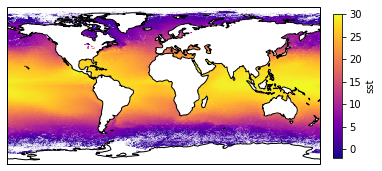

In [5]:
# plot the result with cartoee using a PlateCarre projection (default)
ax = cee.getMap(ocean,cmap='plasma',visParams=visualization,region=bbox)
cb = cee.addColorbar(ax,loc='right',cmap='plasma',visParams=visualization)

ax.coastlines()
plt.show()

### Mapping with different projections

You can specify what ever projection is available within `cartopy` to display the results from Earth Engine. Here are a couple examples of global and regions maps using the sea surface temperature example. Please refer to the [`Cartopy` projection documentation](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) for more examples with different projections.

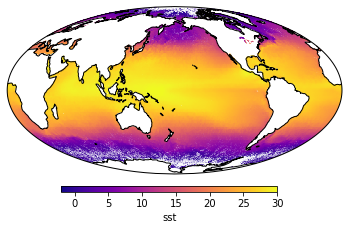

In [6]:
# create a new Mollweide projection centered on the Pacific
projection = ccrs.Mollweide(central_longitude=-180)

# plot the result with cartoee using the Mollweide projection
ax = cee.getMap(ocean,visParams=visualization,region=bbox,
                cmap='plasma',proj=projection)
cb = cee.addColorbar(ax,loc='bottom',cmap='plasma',visParams=visualization,
                    orientation='horizontal')


ax.coastlines()
plt.show()

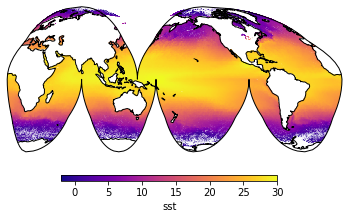

In [7]:
# create a new Goode homolosine projection centered on the Pacific
projection = ccrs.InterruptedGoodeHomolosine(central_longitude=-180)

# plot the result with cartoee using the Goode homolosine projection
ax = cee.getMap(ocean,visParams=visualization,region=bbox,
                cmap='plasma',proj=projection)
cb = cee.addColorbar(ax,loc='bottom',cmap='plasma',visParams=visualization,
                    orientation='horizontal')

ax.coastlines()
plt.show()

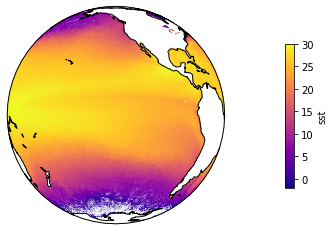

In [8]:
# create a new orographic projection focused on the Pacific
projection = ccrs.Orthographic(-130,-10)

# plot the result with cartoee using the orographic projection
ax = cee.getMap(ocean,visParams=visualization,region=bbox,
                cmap='plasma',proj=projection)
cb = cee.addColorbar(ax,loc='right',cmap='plasma',visParams=visualization,
                    orientation='vertical')
ax.coastlines()
plt.show()

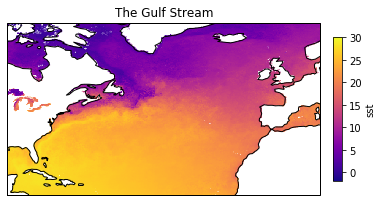

In [9]:
# Create a new region to focus on
natlantic = [-90,15,10,70]

# plot the result with cartoee focusing on the north Atlantic
ax = cee.getMap(ocean,cmap='plasma',visParams=visualization,region=natlantic)
cb = cee.addColorbar(ax,loc='right',cmap='plasma',visParams=visualization,)

ax.coastlines()
ax.set_title('The Gulf Stream')
plt.show()